In [0]:
# !kill -9 -1 # cleaning the memory

In [0]:
from __future__ import print_function, division
import numpy as np
import pandas as pd

import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/MAAI/data/train.csv')
df.to_hdf('train.h5', 'train')

df_full = df
df_full.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['bidid', 'userid', 'useragent', 'IP', 'domain', 'url', 'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'usertag']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [4]:
df_full.shape

(2430981, 25)

In [5]:
columns = ['useragent', 'IP', 'domain', 
                          'url', 'urlid', 'slotid', 'creative', 
                          'bidprice', 'keypage']
df = df.drop(columns=columns)
df.head()

,click,weekday,hour,bidid,userid,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,payprice,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,2,2,2.0,200,200,2,0,5,5,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,238,239,1.0,300,250,FourthView,Na,0,23,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,40,41,2.0,250,250,2,0,5,24,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,1,1,1.0,160,600,2,1,0,25,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,216,233,2.0,728,90,OtherView,Na,133,133,2259,NaN


In [6]:
df.shape

(2430981, 16)

In [7]:
df_full.describe(include='all')

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
count,2.430981e+06,2.430981e+06,2.430981e+06,2430981,2430981,2430981,2430981,2.430981e+06,2.430981e+06,2.381152e+06,...,2.430981e+06,2430981,2430981,2.430981e+06,2430981,2.430981e+06,2.430981e+06,1925991,2.430981e+06,1933502
unique,NaN,NaN,NaN,2430981,2342677,38,503975,NaN,NaN,NaN,...,NaN,11,4,NaN,131,NaN,NaN,18,NaN,744035
top,NaN,NaN,NaN,f75ed89e4d0137b2e6f21db658199e28b39e9bd6,5ac7ec84bb700b7a6bd1c57b1ae7c269af65850b,windows_ie,113.106.102.*,NaN,NaN,NaN,...,NaN,0,0,NaN,44966cc8da1ed40c95d59e863c8c75f0,NaN,NaN,bebefa5efe83beee17a3d245e7c5085b,NaN,10063
freq,NaN,NaN,NaN,1,13,1461665,3455,NaN,NaN,NaN,...,NaN,1006009,1331454,NaN,147811,NaN,NaN,492353,NaN,89991
mean,7.375623e-04,2.888556e+00,1.348925e+01,NaN,NaN,NaN,NaN,1.493833e+02,1.543295e+02,2.109685e+00,...,1.885723e+02,NaN,NaN,2.671783e+01,NaN,2.729620e+02,7.815142e+01,NaN,2.840736e+03,NaN
std,2.714809e-02,2.055223e+00,6.567105e+00,NaN,NaN,NaN,NaN,1.020631e+02,1.033093e+02,8.764370e-01,...,1.314946e+02,NaN,NaN,3.704444e+01,NaN,2.891153e+01,5.984636e+01,NaN,7.841990e+02,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,...,5.000000e+01,NaN,NaN,0.000000e+00,NaN,2.270000e+02,0.000000e+00,NaN,1.458000e+03,NaN
25%,0.000000e+00,1.000000e+00,1.000000e+01,NaN,NaN,NaN,NaN,7.900000e+01,7.900000e+01,1.000000e+00,...,9.000000e+01,NaN,NaN,0.000000e+00,NaN,2.410000e+02,3.300000e+01,NaN,2.259000e+03,NaN
50%,0.000000e+00,3.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,1.460000e+02,1.520000e+02,2.000000e+00,...,9.000000e+01,NaN,NaN,5.000000e+00,NaN,2.940000e+02,6.800000e+01,NaN,3.358000e+03,NaN
75%,0.000000e+00,5.000000e+00,1.900000e+01,NaN,NaN,NaN,NaN,2.160000e+02,2.220000e+02,3.000000e+00,...,2.500000e+02,NaN,NaN,5.000000e+01,NaN,3.000000e+02,9.900000e+01,NaN,3.427000e+03,NaN


In [8]:
df_full.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [9]:
df['adexchange'].value_counts()

3.0    819458
2.0    763428
1.0    718271
4.0     79995
Name: adexchange, dtype: int64

In [0]:
df = df.fillna(0)

In [16]:
def calcluate_num_impressions(df, grouping = False):
    imp = {}
    
    if(grouping):
        imp = df.groupby(grouping).size().to_dict()        
    else:
        imp = len(df)
        
    return imp
    
print('Total Number of Impressions',calcluate_num_impressions(df))

Total Number of Impressions 2430981


In [17]:
def calcluate_num_clicks(df, grouping = False):
    clicks = {}
    
    if(grouping):
        for index, group in df.groupby(grouping):
            clicks[index] = np.sum(group['click'])            
    else:
        clicks = np.sum(df['click'])

    return clicks
    
print('Total Number of Clicks',calcluate_num_clicks(df))

Total Number of Clicks 1793


In [18]:
def calcluate_ctr(df, grouping = False):
    ctr = {}
    
    if(grouping):
        for index, group in df.groupby(grouping):
            ctr[index] = np.average(group['click'])           
    else:
        ctr = np.average(df['click'])
    
    return ctr
    
print('Total Number of CTR ' + str(calcluate_ctr(df)*100) + "%")

Total Number of CTR 0.07375623256619447%


In [19]:
print('Total Cost',np.sum(df['payprice']))

Total Cost 189984608


# **Average Click-Through Rate (CTR) **

In [20]:
print('Average CTR for all bidders {:.5f}'.format(np.average(df['click'])))

Average CTR for all bidders 0.00074


In [0]:
def generate_graph(df,x,y,estimator,ylabel,join=True):
  ax = sns.pointplot(x=x,y=y,
    data=df,estimator=estimator,
    capsize=.1,join=join, color="#ff9933")
  
  plt.ylabel(ylabel)
  plt.setp(ax.lines, linewidth=1)
  plt.show()

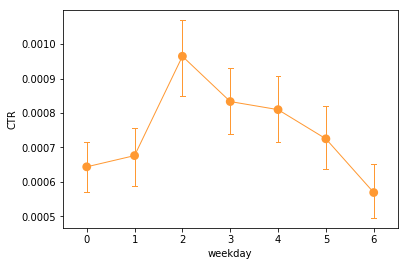

In [22]:
generate_graph(df,"weekday","click",np.average,'CTR')

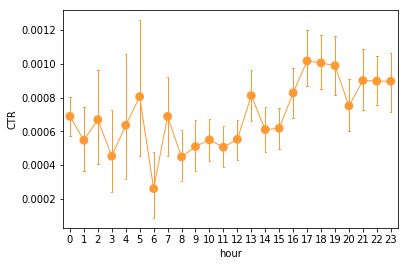

In [23]:
generate_graph(df,"hour","click",np.average,'CTR')

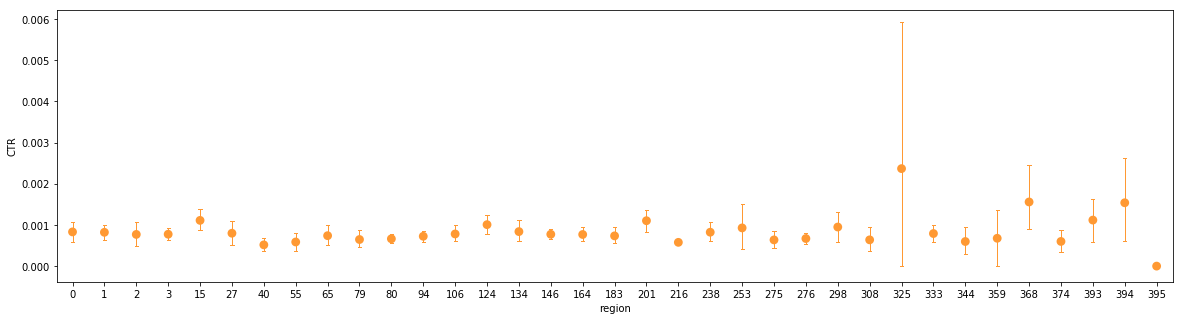

In [26]:
plt.figure(figsize=(20, 5))
ax = sns.pointplot(
    x="region", y="click", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"region","click",np.average,'CTR',False)

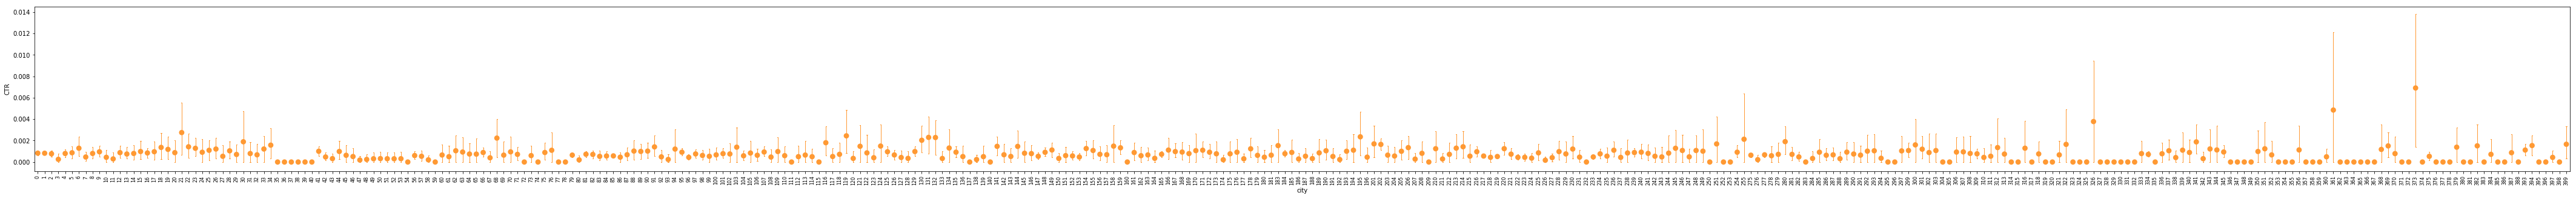

In [27]:
plt.figure(figsize=(75, 5))
ax = sns.pointplot(x="city", y="click", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('CTR')
plt.xticks(fontsize=8, rotation=90)
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"city","click",np.average,'CTR',False)

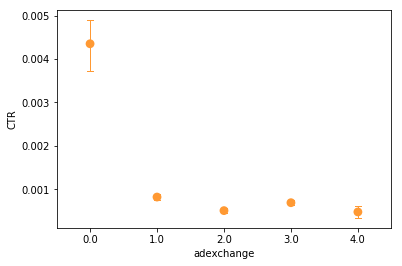

In [28]:
generate_graph(df,"adexchange","click",np.average,'CTR',False)

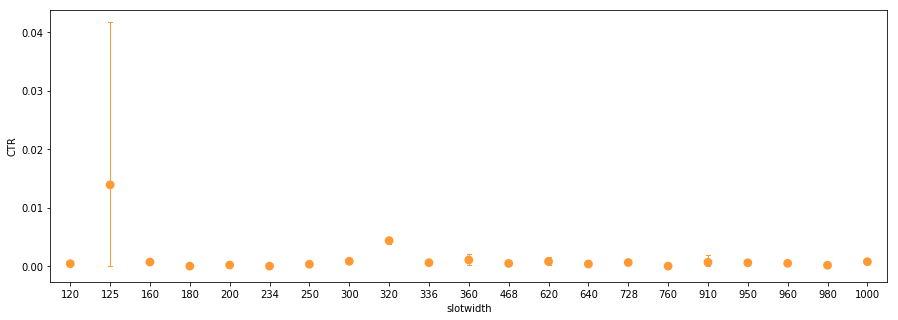

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.pointplot(
    x="slotwidth", y="click", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"slotwidth","click",np.average,'CTR',False)

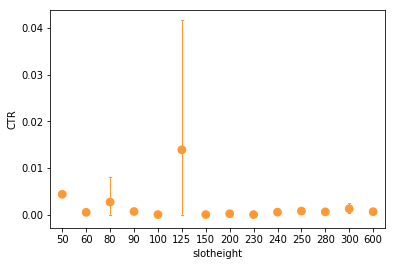

In [31]:
generate_graph(df,"slotheight","click",np.average,'CTR',False)

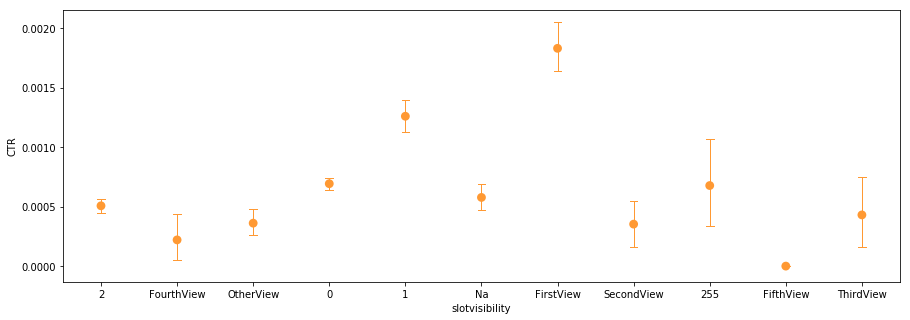

In [39]:
plt.figure(figsize=(15, 5))
ax = sns.pointplot(x="slotvisibility", y="click", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"slotvisibility","click",np.average,'CTR',False)

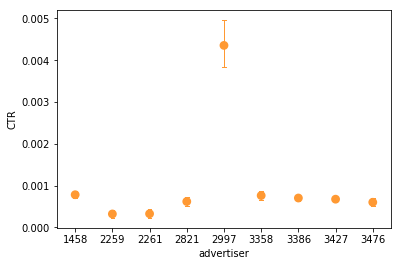

In [33]:
generate_graph(df,"advertiser","click",np.average,'CTR',False)

# **Average Cost-Per-Mille (CPM)**

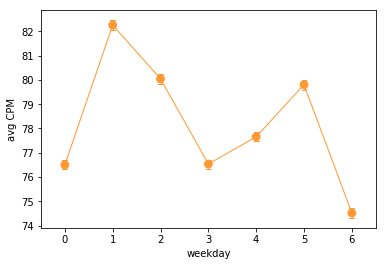

In [34]:
generate_graph(df,"weekday","payprice",np.average,'avg CPM')

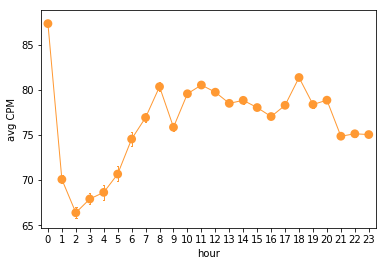

In [35]:
generate_graph(df,"hour","payprice",np.average,'avg CPM')

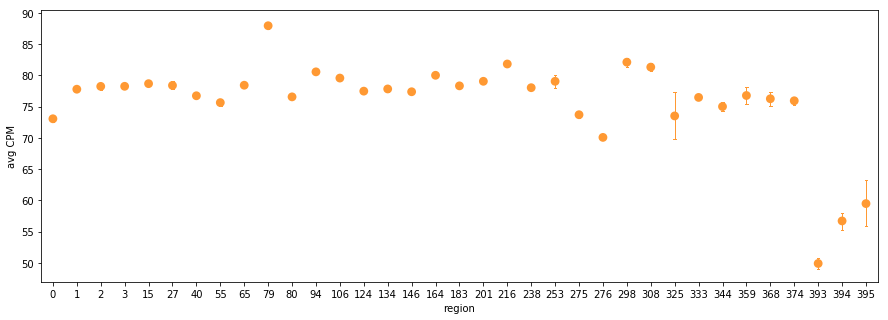

In [36]:
plt.figure(figsize=(20, 5))
ax = sns.pointplot(x="region",y="payprice",data=df,
    estimator=np.average,capsize=.1,
    join=False,color="#ff9933")
plt.ylabel('avg CPM')
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"region","payprice",np.average,'avg CPM',False)

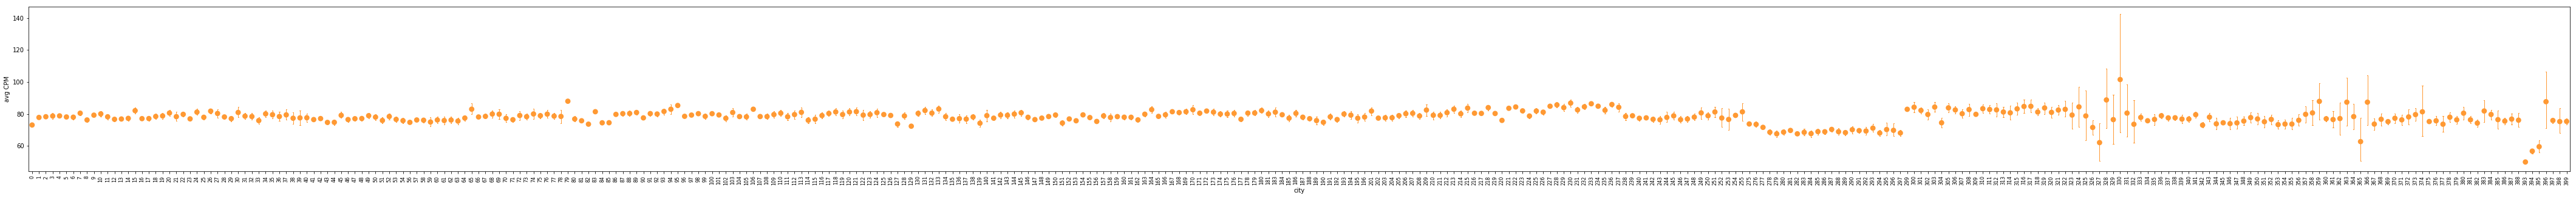

In [37]:
plt.figure(figsize=(75, 5))
ax = sns.pointplot(x="city", y="payprice", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('avg CPM')
plt.xticks(fontsize=8, rotation=90)
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"city","payprice",np.average,'avg CPM',False)

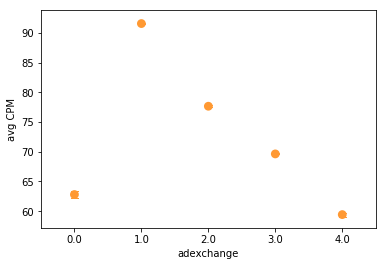

In [38]:
generate_graph(df,"adexchange","payprice",np.average,'avg CPM',False)

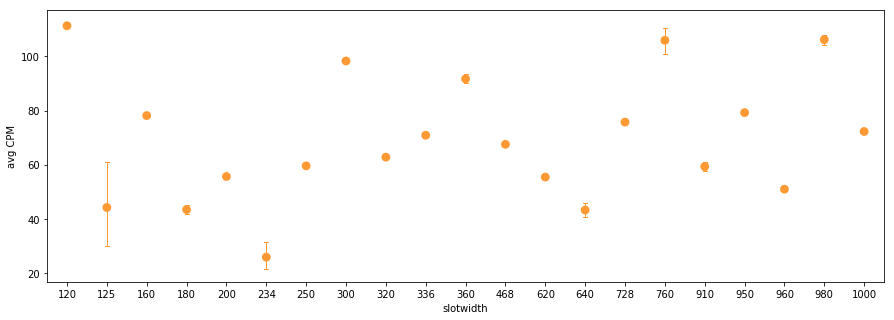

In [43]:
plt.figure(figsize=(15, 5))
ax = sns.pointplot(x="slotwidth", y="payprice", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('avg CPM')
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"slotwidth","payprice",np.average,'avg CPM',False)

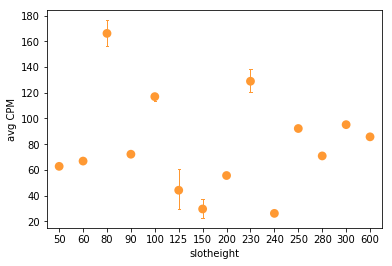

In [41]:
generate_graph(df,"slotheight","payprice",np.average,'avg CPM',False)

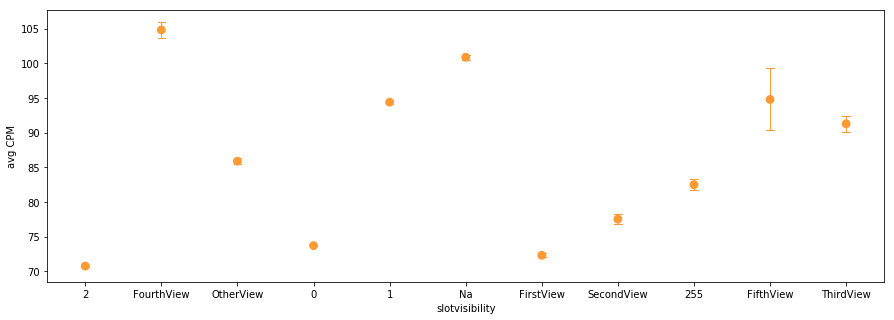

In [40]:
plt.figure(figsize=(15, 5))
ax = sns.pointplot(x="slotvisibility", y="payprice", data=df,
    estimator=np.average, capsize=.1,
    join=False, color="#ff9933")
plt.ylabel('avg CPM')
plt.setp(ax.lines, linewidth=1)
plt.show()
# generate_graph(df,"slotvisibility","payprice",np.average,'avg CPM',False)

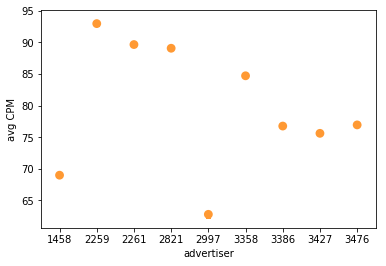

In [42]:
generate_graph(df,"advertiser","payprice",np.average,'avg CPM',False)

# **Effective Cost-Per-Click**

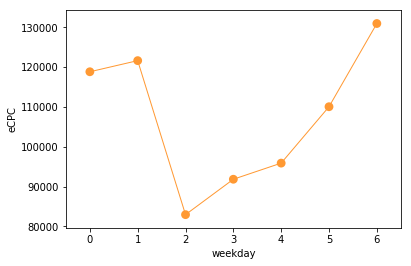

In [44]:
dfWE = df.groupby('weekday').agg({'click': ['sum'], 'payprice': ['sum']})
dfWE['eCPC'] = dfWE['payprice'] / dfWE['click']
dfWE['weekday'] = dfWE.index

ax = sns.pointplot(x='weekday', y='eCPC', data=dfWE,
    capsize=.1, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

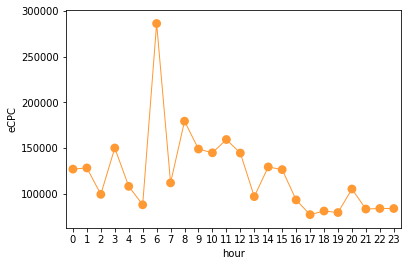

In [45]:
dfHE = df.groupby('hour').agg({'click': ['sum'], 'payprice': ['sum']})
dfHE['eCPC'] = dfHE['payprice'] / dfHE['click']
dfHE['hour'] = dfHE.index

ax = sns.pointplot(x="hour", y="eCPC", data=dfHE,
    capsize=.1, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

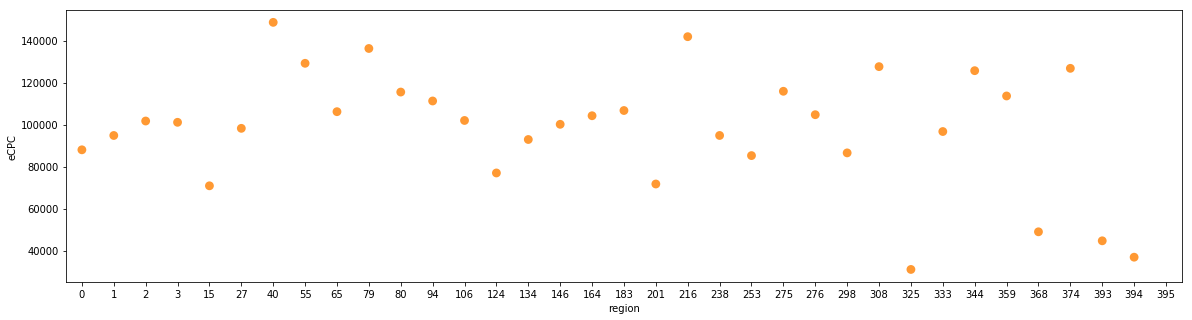

In [46]:
dfRE = df.groupby('region').agg({'click': ['sum'], 'payprice': ['sum']})
dfRE['eCPC'] = dfRE['payprice'] / dfRE['click']
dfRE['region'] = dfRE.index

plt.figure(figsize=(20, 5))
ax = sns.pointplot(x="region", y="eCPC", data=dfRE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

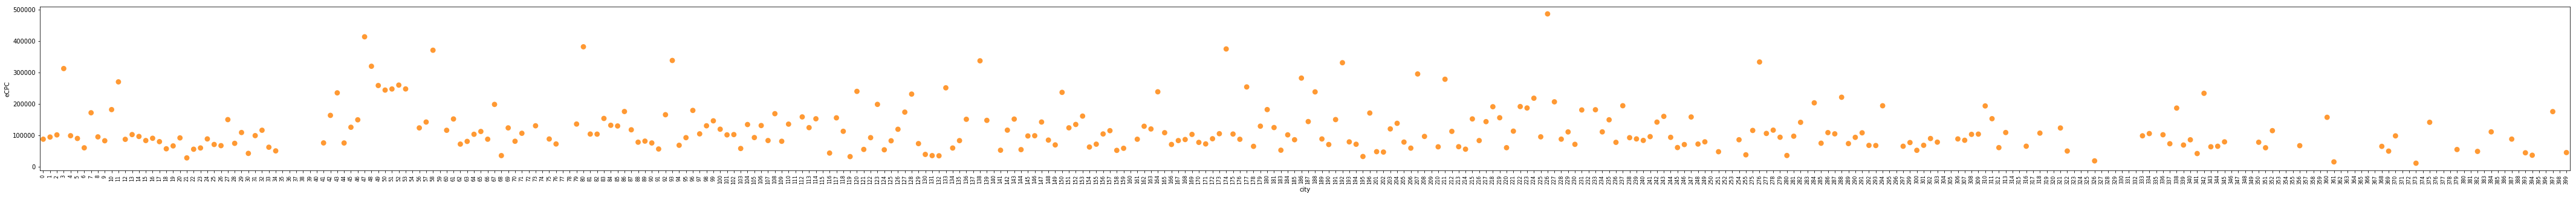

In [47]:
dfCE = df.groupby('city').agg({'click': ['sum'], 'payprice': ['sum']})
dfCE['eCPC'] = dfCE['payprice'] / dfCE['click']
dfCE['city'] = dfCE.index

plt.figure(figsize=(75, 5))
ax = sns.pointplot(x="city", y="eCPC", data=dfCE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.xticks(fontsize=8, rotation=90)
plt.setp(ax.lines, linewidth=1)
plt.show()

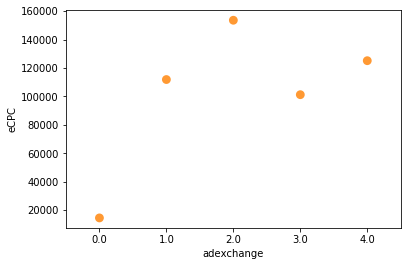

In [48]:
dfAE = df.groupby('adexchange').agg({'click': ['sum'], 'payprice': ['sum']})
dfAE['eCPC'] = dfAE['payprice'] / dfAE['click']
dfAE['adexchange'] = dfAE.index

ax = sns.pointplot(x="adexchange", y="eCPC", data=dfAE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

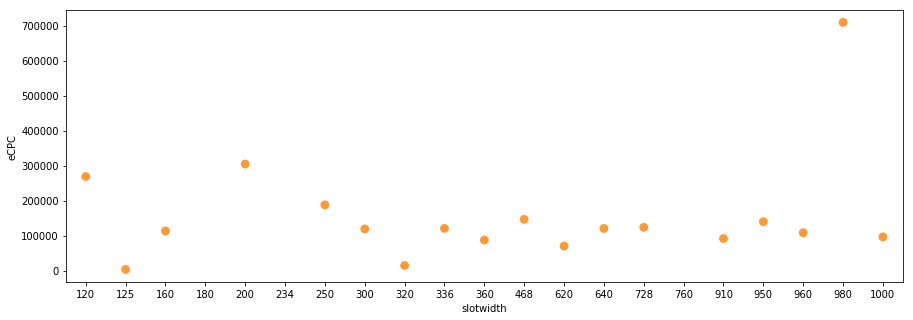

In [49]:
dfSE = df.groupby('slotwidth').agg({'click': ['sum'], 'payprice': ['sum']})
dfSE['eCPC'] = dfSE['payprice'] / dfSE['click']
dfSE['slotwidth'] = dfSE.index

plt.figure(figsize=(15, 5))
ax = sns.pointplot(x="slotwidth", y="eCPC", data=dfSE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

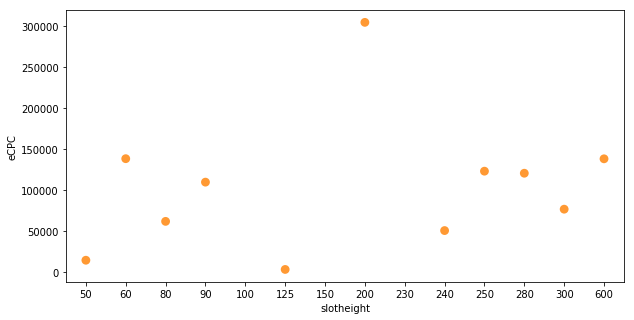

In [50]:
dfSHE = df.groupby('slotheight').agg({'click': ['sum'], 'payprice': ['sum']})
dfSHE['eCPC'] = dfSHE['payprice'] / dfSHE['click']
dfSHE['slotheight'] = dfSHE.index

plt.figure(figsize=(10, 5))
ax = sns.pointplot(x="slotheight", y="eCPC", data=dfSHE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

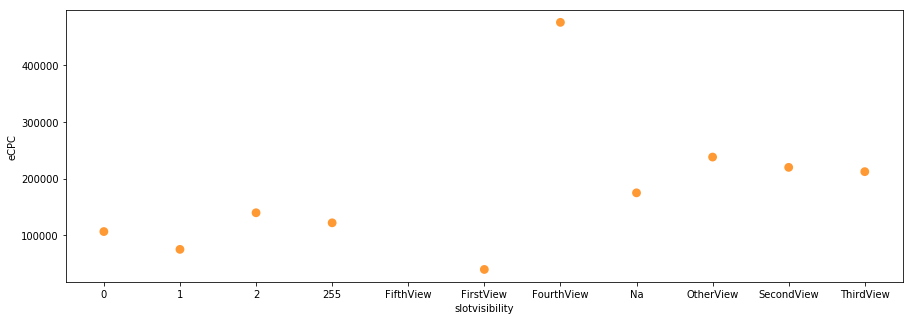

In [51]:
dfSVE = df.groupby('slotvisibility').agg({'click': ['sum'], 'payprice': ['sum']})
dfSVE['eCPC'] = dfSVE['payprice'] / dfSVE['click']
dfSVE['slotvisibility'] = dfSVE.index

plt.figure(figsize=(15, 5))
ax = sns.pointplot(x="slotvisibility", y="eCPC", data=dfSVE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()

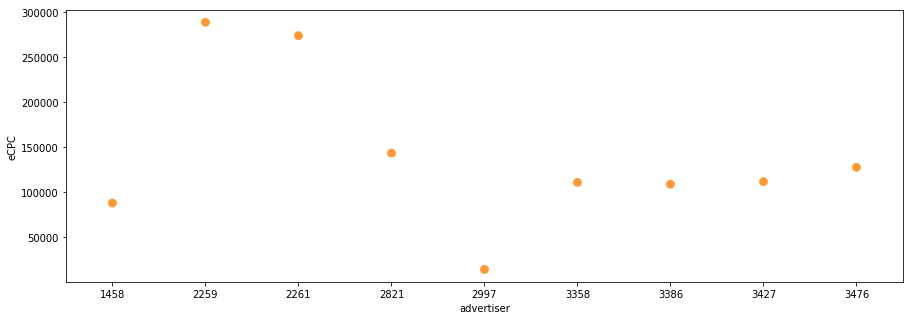

In [52]:
dfADE = df.groupby('advertiser').agg({'click': ['sum'], 'payprice': ['sum']})
dfADE['eCPC'] = dfADE['payprice'] / dfADE['click']
dfADE['advertiser'] = dfADE.index

plt.figure(figsize=(15,5))
ax = sns.pointplot(x="advertiser", y="eCPC", data=dfADE,
    capsize=.1, join=False, color="#ff9933")
plt.ylabel('eCPC')
plt.setp(ax.lines, linewidth=1)
plt.show()